In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [68]:
train = pd.read_csv('/content/gdrive/My Drive/MachineHack - Detecting Anomalies in Wafer Manufacturing/Train.csv')
test = pd.read_csv('/content/gdrive/My Drive/MachineHack - Detecting Anomalies in Wafer Manufacturing/Test.csv')

In [155]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
print(train.shape)
print(test.shape)

(1763, 1559)
(756, 1558)


In [72]:
print(train.describe())

         feature_1    feature_2  ...  feature_1558        Class
count  1763.000000  1763.000000  ...   1763.000000  1763.000000
mean     53.094158   126.587067  ...      0.001134     0.081112
std      55.842014   129.859641  ...      0.033672     0.273084
min       1.000000     1.000000  ...      0.000000     0.000000
25%      12.000000    33.500000  ...      0.000000     0.000000
50%      39.000000    96.000000  ...      0.000000     0.000000
75%      75.000000   159.000000  ...      0.000000     0.000000
max     640.000000   640.000000  ...      1.000000     1.000000

[8 rows x 1559 columns]


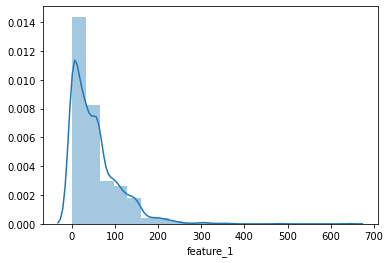

In [73]:
sns.distplot(train['feature_1'], bins = 20)

In [ ]:
!pip install catboost

In [76]:
from numpy import mean, std
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import QuantileTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [165]:
train_new = train[['feature_1400','feature_2', 'feature_3','feature_352','feature_1','feature_399','feature_1522','feature_387',
                   'feature_1527','feature_999', 'feature_1204' ,'feature_639', 'feature_1023', 'feature_1501', 'feature_1061', 
                   'feature_1254', 'feature_1430', 'feature_135', 'feature_662', 'feature_1403', 'feature_176', 'feature_1489', 
                   'feature_1508', 'feature_735', 'feature_628', 'feature_1514', 'feature_1231', 'feature_1022',
                   'feature_1262', 'feature_1401', 'feature_854', 'feature_1543', 'feature_1082','feature_1557', 'feature_1455', 'feature_1437',
                   'feature_927', 'feature_984', 'feature_466', 'feature_381', 'feature_530', 'feature_1149', 
                   'feature_1008', 'feature_1510', 'feature_1212', 'feature_1354', 'feature_140', 'feature_247', 'feature_882', 
                   'feature_1374', 'feature_1429', 'feature_1545', 'feature_623', 'feature_1167', 'feature_1480', 
                   'feature_87', 'feature_1533', 'feature_318', 'feature_436', 'feature_358', 'feature_1502',
                   'feature_1318', 'feature_950', 'feature_939', 'feature_457', 'feature_1024', 'feature_1433', 'feature_1279', 
                   'feature_861', 'feature_1017', 'feature_521', 'feature_1369', 'feature_351', 'feature_952', 'feature_1446', 
                   'feature_526', 'feature_1528', 'feature_656', 'feature_60', 'feature_1168', 'feature_1303', 'feature_1534', 
                   'feature_1087', 'feature_1088', 'feature_1439', 'feature_380', 'feature_236', 'feature_988', 'feature_137', 
                   'feature_168','feature_1555', 'feature_1130', 'feature_1531', 'feature_878', 'feature_418', 'feature_169', 
                   'feature_419', 'feature_1456', 'feature_1471', 'feature_1054']]

In [167]:
test_new = test[['feature_1400','feature_2', 'feature_3','feature_352','feature_1','feature_399','feature_1522','feature_387',
                   'feature_1527','feature_999', 'feature_1204' ,'feature_639', 'feature_1023', 'feature_1501', 'feature_1061', 
                   'feature_1254', 'feature_1430', 'feature_135', 'feature_662', 'feature_1403', 'feature_176', 'feature_1489', 
                   'feature_1508', 'feature_735', 'feature_628', 'feature_1514', 'feature_1231', 'feature_1022',
                   'feature_1262', 'feature_1401', 'feature_854', 'feature_1543', 'feature_1082','feature_1557', 'feature_1455', 'feature_1437',
                   'feature_927', 'feature_984', 'feature_466', 'feature_381', 'feature_530', 'feature_1149', 
                   'feature_1008', 'feature_1510', 'feature_1212', 'feature_1354', 'feature_140', 'feature_247', 'feature_882', 
                   'feature_1374', 'feature_1429', 'feature_1545', 'feature_623', 'feature_1167', 'feature_1480', 
                   'feature_87', 'feature_1533', 'feature_318', 'feature_436', 'feature_358', 'feature_1502',
                   'feature_1318', 'feature_950', 'feature_939', 'feature_457', 'feature_1024', 'feature_1433', 'feature_1279', 
                   'feature_861', 'feature_1017', 'feature_521', 'feature_1369', 'feature_351', 'feature_952', 'feature_1446', 
                   'feature_526', 'feature_1528', 'feature_656', 'feature_60', 'feature_1168', 'feature_1303', 'feature_1534', 
                   'feature_1087', 'feature_1088', 'feature_1439', 'feature_380', 'feature_236', 'feature_988', 'feature_137', 
                   'feature_168','feature_1555', 'feature_1130', 'feature_1531', 'feature_878', 'feature_418', 'feature_169', 
                   'feature_419', 'feature_1456', 'feature_1471', 'feature_1054']]

In [169]:
train_new.head()

,feature_1400,feature_2,feature_3,feature_352,feature_1,feature_399,feature_1522,feature_387,feature_1527,feature_999,feature_1204,feature_639,feature_1023,feature_1501,feature_1061,feature_1254,feature_1430,feature_135,feature_662,feature_1403,feature_176,feature_1489,feature_1508,feature_735,feature_628,feature_1514,feature_1231,feature_1022,feature_1262,feature_1401,feature_854,feature_1543,feature_1082,feature_1557,feature_1455,feature_1437,feature_927,feature_984,feature_466,feature_381,...,feature_1502,feature_1318,feature_950,feature_939,feature_457,feature_1024,feature_1433,feature_1279,feature_861,feature_1017,feature_521,feature_1369,feature_351,feature_952,feature_1446,feature_526,feature_1528,feature_656,feature_60,feature_1168,feature_1303,feature_1534,feature_1087,feature_1088,feature_1439,feature_380,feature_236,feature_988,feature_137,feature_168,feature_1555,feature_1130,feature_1531,feature_878,feature_418,feature_169,feature_419,feature_1456,feature_1471,feature_1054
0,0,160,1.6000,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,83,4.1500,1,20,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
2,0,150,1.5151,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,40,1.0000,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,234,19.5000,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
print(train.groupby('Class').size())

Class
0    1620
1     143
dtype: int64


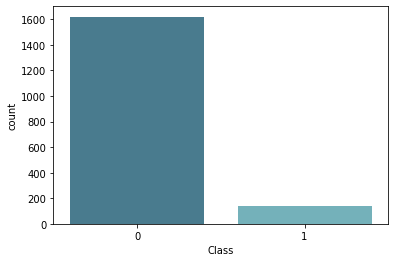

In [178]:
sns.countplot(x = 'Class', palette = 'GnBu_d', data = train);

In [183]:
# Splitting training dataset into train and test
X = train_new.copy().values
y = train['Class']
test = test_new.copy()

In [176]:
print(train_new.shape)
print(X.shape)
print(y.shape)
print(test.shape)

(1763, 100)
(1763, 100)
(1763,)
(756, 100)


In [175]:
model = XGBClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('ROC_AUC_Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC_AUC_Score: 0.919 (0.034)


XGB = ROC_AUC_Score: 0.913 (0.037)

LGBM = ROC_AUC_Score: 0.909 (0.029)

Catboost = ROC_AUC_Score: 0.915 (0.030)

Ada = ROC_AUC_Score: 0.870 (0.050)

GBM = ROC_AUC_Score: 0.888 (0.039)

MLP = ROC_AUC_Score: 0.915 (0.030)

RF = ROC_AUC_Score: 0.903 (0.037)

ETC = ROC_AUC_Score: 0.851 (0.042)

SVC = ROC_AUC_Score: 0.860 (0.045)

NB = ROC_AUC_Score: 0.720 (0.063)

LDA = ROC_AUC_Score: 0.737 (0.072)

KNN = ROC_AUC_Score: 0.803 (0.048)

DT = ROC_AUC_Score: 0.678 (0.055)

LR = ROC_AUC_Score: 0.892 (0.048)

# Combine Undersampling and Oversampling

In [270]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=7)

In [180]:
# from imblearn.combine import SMOTEENN
# sample = SMOTEENN(sampling_strategy = 0.5,random_state = 10101)
# smote_train, smote_train_target = sample.fit_resample(X_train,y_train)
# smote_test, smote_test_target = sample.fit_resample(X_test,y_test)

In [268]:
# Splitting training dataset into train and test
X = train.copy().drop(['Class'], axis=1).values
y = train['Class']
test = test.copy()

In [269]:
sample = SMOTEENN(sampling_strategy=0.5)

X_over, y_over = sample.fit_resample(X, y)

In [273]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# X_whole = sc.transform(X.copy())
# test_v = sc.transform(test)

In [275]:
# n_estimators=500, random_state=10, learning_rate=0.9
ada = CatBoostClassifier()
ada_fit = ada.fit(X_train, y_train)


y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)


print(metrics.roc_auc_score(y_test, y_ada_pred_test))#test accuracy
print(metrics.roc_auc_score(y_train, y_ada_pred_train))#train accuracy

Learning rate set to 0.012725
0:	learn: 0.6739453	total: 21.4ms	remaining: 21.4s
1:	learn: 0.6559677	total: 38ms	remaining: 19s
2:	learn: 0.6400383	total: 54.4ms	remaining: 18.1s
3:	learn: 0.6228703	total: 71.1ms	remaining: 17.7s
4:	learn: 0.6056175	total: 87.8ms	remaining: 17.5s
5:	learn: 0.5921159	total: 104ms	remaining: 17.3s
6:	learn: 0.5795408	total: 121ms	remaining: 17.1s
7:	learn: 0.5653575	total: 137ms	remaining: 17s
8:	learn: 0.5514906	total: 153ms	remaining: 16.9s
9:	learn: 0.5400160	total: 170ms	remaining: 16.9s
10:	learn: 0.5263031	total: 187ms	remaining: 16.8s
11:	learn: 0.5151207	total: 209ms	remaining: 17.2s
12:	learn: 0.5028717	total: 226ms	remaining: 17.1s
13:	learn: 0.4900368	total: 242ms	remaining: 17.1s
14:	learn: 0.4781533	total: 259ms	remaining: 17s
15:	learn: 0.4669650	total: 275ms	remaining: 16.9s
16:	learn: 0.4554353	total: 292ms	remaining: 16.9s
17:	learn: 0.4458534	total: 309ms	remaining: 16.8s
18:	learn: 0.4360123	total: 325ms	remaining: 16.8s
19:	learn: 0.4

In [262]:
test_pred = ada_fit.predict(test_v)

In [263]:
subm = pd.DataFrame({'Class': test_pred})
subm = subm[['Class']]

In [264]:
subm.to_csv('/content/gdrive/My Drive/MachineHack - Detecting Anomalies in Wafer Manufacturing/submission.csv', index=False)
print('Exported')

Exported
